# P7 - Neural Network Demo

## Neural Network Regression using the California Housing Dataset

In [1]:
# %pip install numpy pandas matplotlib scikit-learn

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# We will use an example dataset that comes with scikit learn
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing(as_frame=True)
print(california.data.shape)
print(california.target.shape)

(20640, 8)
(20640,)


In [21]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [22]:
df = california.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [23]:
X = california.data
y = california.target

In [24]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [25]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

Let's split the data into train, validation and test set!
We choose the test set to be 20% of the data and the validation set to be 20% of the remaining 80%.

In [26]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=1337)

## Recall: Linear Regression Performance

We fit four different linear regression models to the California Housing dataset a few weeks ago. Recall the validation RMSE:

+ $f_{\theta_0^*}(\text{MedInc})$ with $R^2 = 0.48$ and $RMSE = 0.83$
    + Too simple, underfitting
+ $f_{\theta_1^*}(\text{MedInc}, \text{Lat}, \text{Lon})$ with $R^2 = 0.59$ and $RMSE = 0.75$
    + Decent fit, still simple and interpretable
+ $f_{\theta_2^*}(\text{MedInc}, \text{Lat}, \text{Lon})$ with $R^2 = 0.60$ and $RMSE = 0.73$
    + Decent fit, includes manual feature engineering, but is still interpretable
+ $f_{\theta_3^*}(\text{MedInc}, \text{Lat}, \text{Lon})$ with $R^2 = 0.64$ and $RMSE = 0.69$
    + Best fit, but is less interpretable (more complex)

## Neural Network

This time, we will use a neural network to predict the house prices. Moreoever, we will use all available features (they are all numeric).

First, we scale the features using the `StandardScaler` from `scikit-learn`. 
This is important because the features have different scales and we want to make sure that the model does not get confused by this.

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [28]:
from sklearn.neural_network import MLPRegressor

def plot_true_vs_pred(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    rmse = np.sqrt(mse)
    m = np.max([np.max(y_true), np.max(y_pred)])

    plt.figure(figsize=(8, 8))
    plt.plot([0, m], [0, m], c='r')
    plt.scatter(y_pred, y_true, s=5)
    plt.xlabel('y_pred')
    plt.ylabel('y_true')
    plt.title(f'Predictions vs True Targets\nRMSE = {np.round(rmse, 3)}')
    plt.show()


def train_model_and_plot_eval(model):
    # train the model
    model.fit(X_train, y_train)

    # make predictions
    y_pred_val = model.predict(X_val)
    plot_true_vs_pred(y_true=y_val, y_pred=y_pred_val)

    # plot train loss curve (if available)
    if hasattr(model, 'loss_curve_'):
        plt.figure(figsize=(7.7, 4))
        plt.plot(np.sqrt(model.loss_curve_))
        plt.title('Train Loss (RMSE) Curve')
        plt.xlabel('Epoch Number')
        plt.ylabel('Train Loss (RMSE)')
        plt.show()

## Model 1

+ We create a feedforward neural network with one hidden layer with 50 neurons and the ReLU activation function.
+ We use a mini-batch size of 32 (i.e., $|\mathcal{B}| = 32$) and use the Adam optimizer with default (constant) learning rate (essentially a variant of stochastic gradient descent).

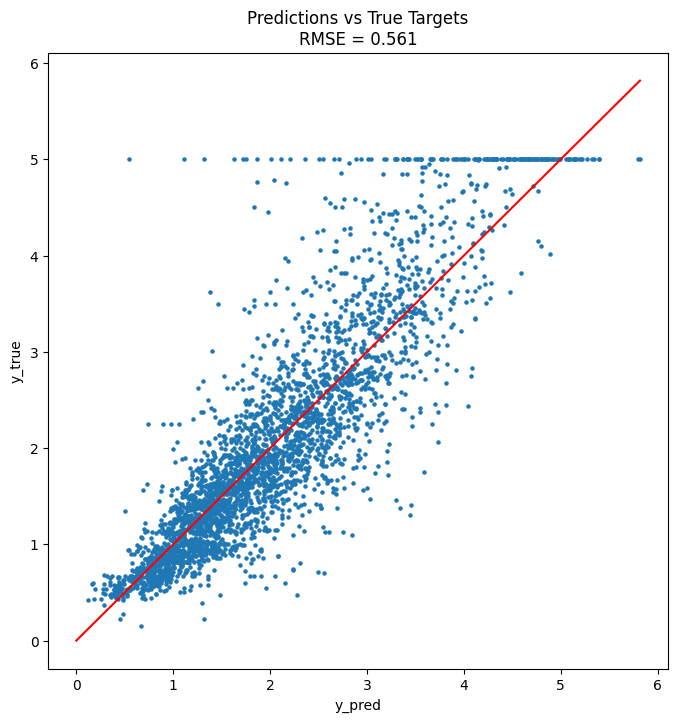

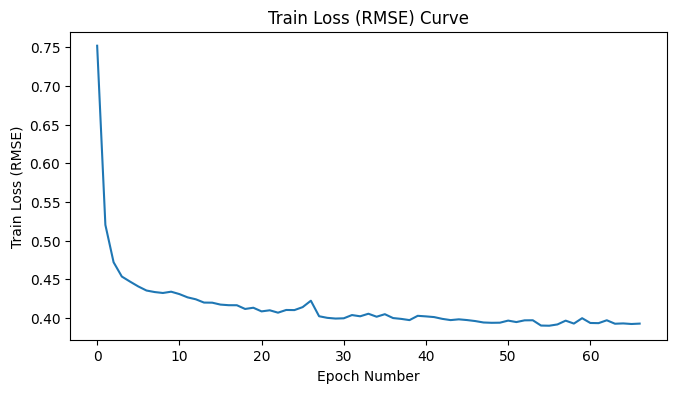

In [29]:
model1 = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', 
                     max_iter=200, batch_size=32,
                     solver='adam', random_state=1337, verbose=False)

train_model_and_plot_eval(model1)

Above, we scatter plot `y_pred` vs `y_true`. If we used the *perfect* regressor (`y_pred == y_true` for all samples) this plot would show the *identity function* here ($45^\circ$ line).
Also, we show the train loss (root mean squared error, RMSE) vs. the epoch number.

## Model 2

+ We copy model 1 but change the activation in the *hidden layer* to `logistic` (i.e., the sigmoid function).
+ Note: ReLU is a good default choice for the activation function in hidden layers (especially in Deep Neural Networks).

/home/wedenigt/Uni/PhD/ml_venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


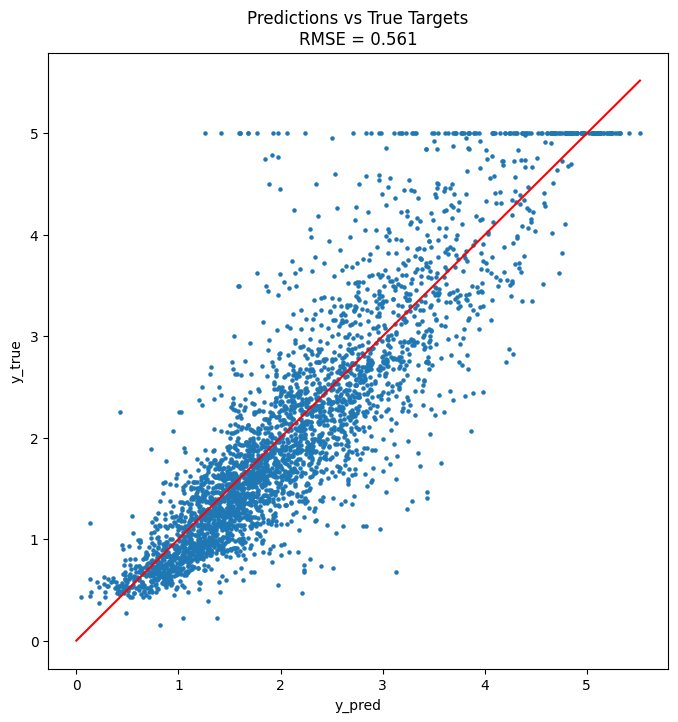

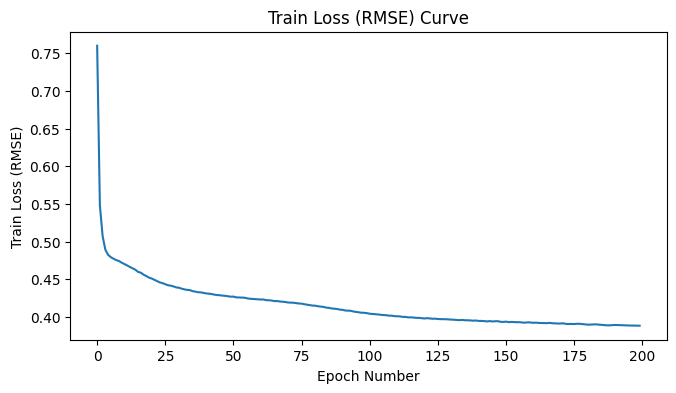

In [30]:
model2 = MLPRegressor(hidden_layer_sizes=(50,), activation='logistic', 
                     max_iter=200, batch_size=32,
                     solver='adam', random_state=1337, verbose=False)

train_model_and_plot_eval(model2)

## Model 3

+ Let's create two hidden layers with 100 and 50 neurons respectively
+ We still use the sigmoid activation function in the hidden layers.

/home/wedenigt/Uni/PhD/ml_venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


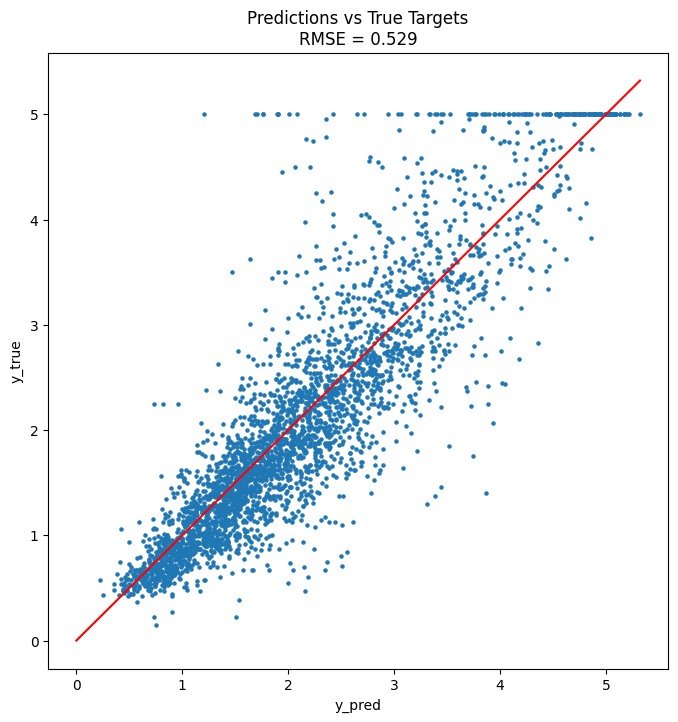

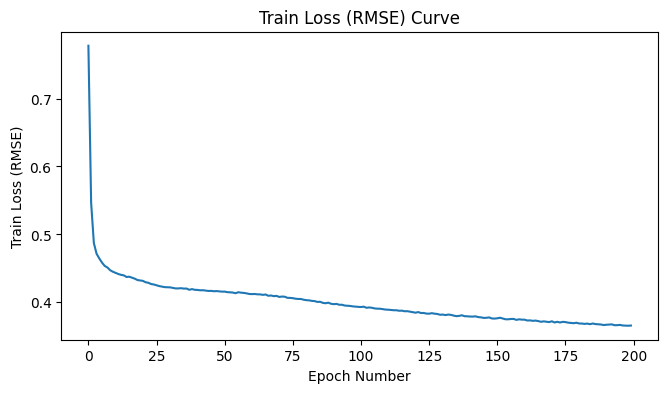

In [31]:
model3 = MLPRegressor(hidden_layer_sizes=(100, 50), activation='logistic', 
                      max_iter=200, batch_size=32,
                      solver='adam', random_state=1337, verbose=False)

train_model_and_plot_eval(model3)

## Model 4

+ We copy model 3 but change the activation in the *hidden layer* to ReLU. 
+ So far, this model has the best performance on the validation set.

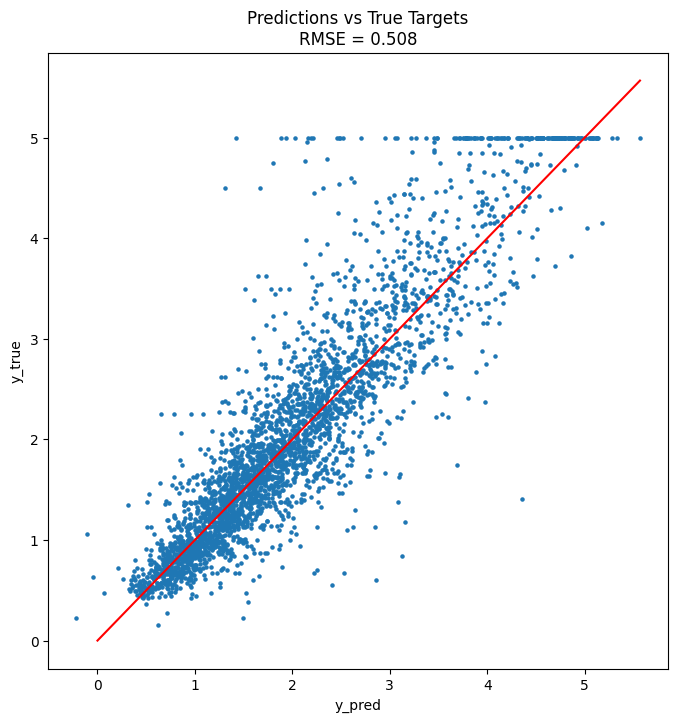

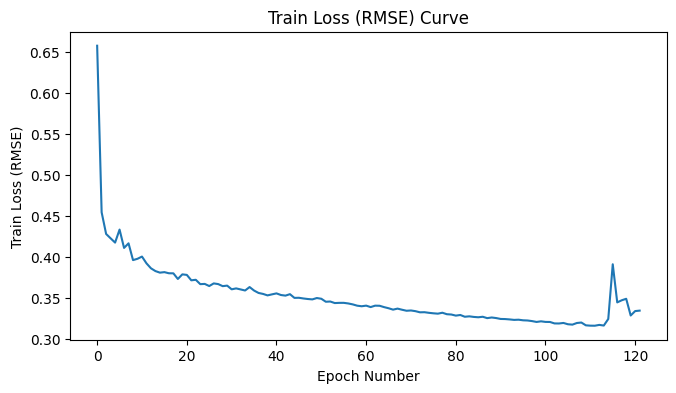

In [32]:
model4 = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', 
                      max_iter=200, batch_size=32,
                      solver='adam', random_state=1337, verbose=False)

train_model_and_plot_eval(model4)

## Model 5

+ We copy model 4, but we use a different optimizer (solver), namely `lbfgs`
+ We remove `batch_size` because `lbfgs` does not use mini-batches (it loops over the entire data set).

/home/wedenigt/Uni/PhD/ml_venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


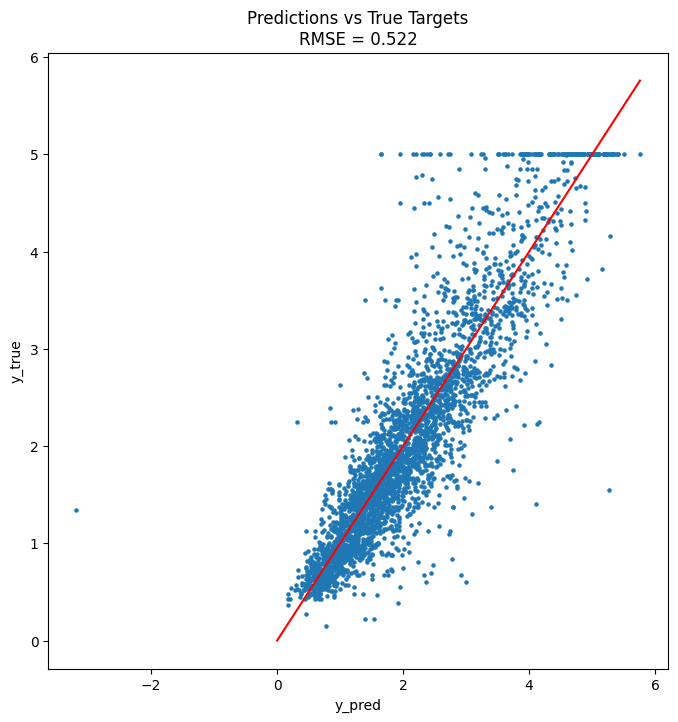

In [33]:
model5 = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', 
                      max_iter=400,
                      solver='lbfgs', random_state=1337, verbose=False)

train_model_and_plot_eval(model5)

## Model 6

+ We use Model 4 but now use three hidden layers with 100, 50, and 25 neurons respectively.
+ This does not perform better on the validation set than Model 4.
+ We will see how we can improve this next week (using "Early Stopping").

/home/wedenigt/Uni/PhD/ml_venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


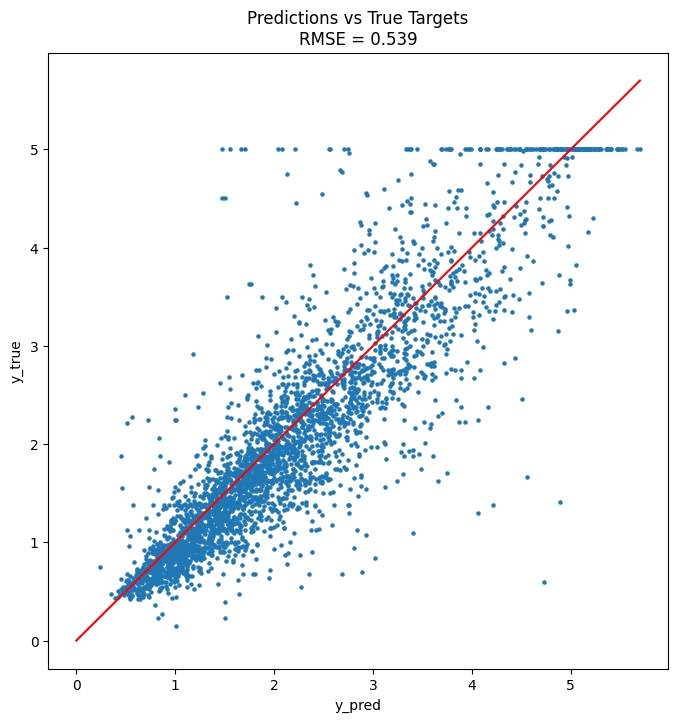

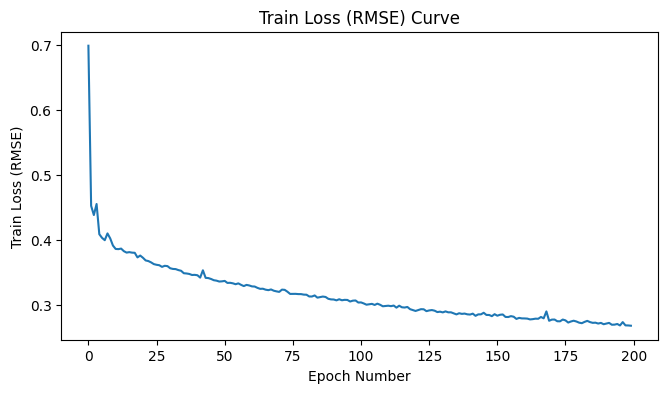

In [34]:
model6 = MLPRegressor(hidden_layer_sizes=(100, 50, 25), activation='relu', 
                      max_iter=200, batch_size=32,
                      solver='adam', random_state=1337, verbose=False)

train_model_and_plot_eval(model6)

# Model Selection

We now have 6 models, as seen in the following table:

| Model | Hidden Layers | Neurons | Activation | Optimizer | Validation RMSE |
|-------|---------------|---------|------------|-----------|------|
| 1     | 1             | 50      | ReLU       | Adam      | 0.561 |
| 2     | 1             | 50      | Sigmoid    | Adam      | 0.561 |
| 3     | 2             | 100, 50 | Sigmoid    | Adam      | 0.529 |
| 4     | 2             | 100, 50 | ReLU       | Adam      | **0.508** |
| 5     | 2             | 100, 50 | ReLU       | L-BFGS     | 0.522 |
| 6     | 3             | 100, 50, 25 | ReLU       | Adam     | 0.539 |

## Test Set Performance

We will thus select Model 4 as our final model (as it has the lowest validation RMSE). Let's now evaluate this model on the test set.

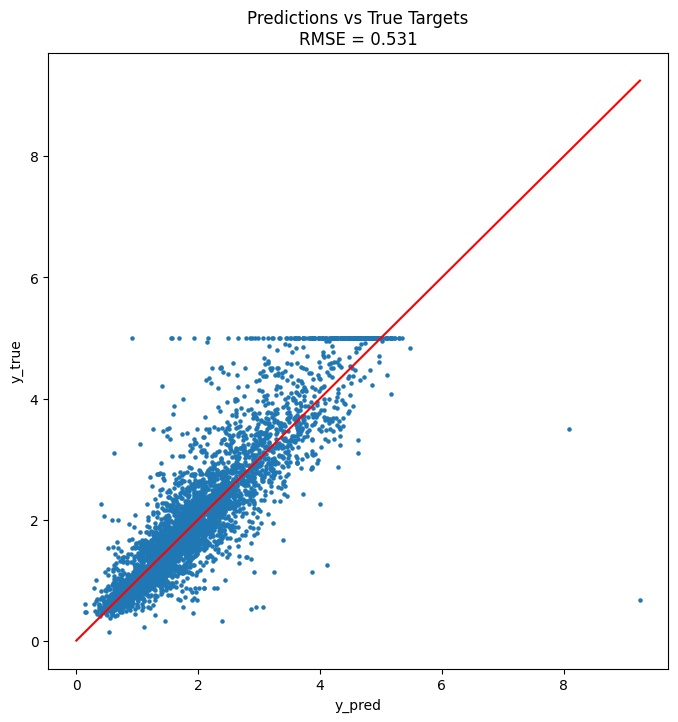

In [19]:
y_pred_test = model4.predict(X_test)
plot_true_vs_pred(y_true=y_test, y_pred=y_pred_test)

**Important**: We do not touch the test set until the very end of our model selection process!

We don't want to use the test set to make *any* decisions about our model. It should only be used to assess the final model performance.